In [2]:
# Импортируем основные модули pytorch
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

# Импортируем модули, связанные с компьютерным зрением
from torchvision import datasets
from torchvision.transforms import ToTensor

# Импортируем вспомогательные модули
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Часть 1

В первой части работы вам предстоит создать и обучить модель на основе полносвязной нейронной сети, аналогичной той,
что вы уже обучали в первом семестре вручную: сети с одним скрытым слоем и логистической функцией активации.
В качестве обучающего набора будем использовать уже известный нам набор MNIST.

### **Класс полносвязной нейронной сети.**

Необходимо реализовать полносвязную нейронную сеть с одним скрытым слоем
с логистической функцией активации на скрытом слое и SoftMax на выходном слое.
Схема сети: 

`Линейный слой -> Логическая функция -> Линейный слой -> SoftMax`

Сеть должна классифицировать черно-белые картинки с цифрами (0-9) размера 28х28 пискселей из набора данных MNIST.

Подумайте, какую функцию потерь будете использовать при обучении: от этого будет зависеть функция на последнем слое.

Разберитесь в функциях потерь CrossEntropyLoss, NLLLoss, а также в функцих активации LogSoftmax и Softmax по документации.

После успешной реализации требуемой сети, попробуйте поиграть с количеством нейронов, слоев, типами функций активации.
Какой максимальной точности на тестовой выборке удалось достичь?

In [ ]:
class FullyConnectedNet(nn.Module):

    def __init__(self):
        super().__init__()
        # ВАШ КОД ЗДЕСЬ
        self.classifier = nn.Sequential(
            nn.Linear(28*28, 256),
            nn.Sigmoid(),
            nn.Linear(256, 10),        
        )
        # ===============

    # Метод для выполнения прямого распространения сигнала, необходимо заполнить
    def forward(self, x):
        # ВАШ КОД ЗДЕСЬ
        return self.classifier(x)
        # ===============

In [ ]:
# Задаем количество эпох (проходов по всей обучающей выборке) и размер пакета, можно варьировать
EPOCHS = 10
BATCH_SIZE = 512

In [ ]:
# Если графический ускоритель поддерживает обучение на нем, будем использовать его,
# иначе обучать на процессоре.
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
# Загружаем данные из набора MNIST
train_data = datasets.MNIST(root='../data/MNIST/train', train=True, download=True, transform=ToTensor())
test_data = datasets.MNIST(root='../data/MNIST/test', train=False, download=True, transform=ToTensor())

# DataLoader позволяет разбить выборку на пакеты заданного размера.
# Параметр shuffle отвечает за перемешивание данных в пакете
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
# Готовимся к обучению
model = FullyConnectedNet().to(device)  # создаем модель
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01, momentum=0.95)  # оптимизатор, нужно выбрать и настроить
loss_function = nn.CrossEntropyLoss()  # функция потерь, нужно выбрать
loss_history = list()  # список для хранения истории изменения функции стоимости

Эпоха 1 завершилась с функцией стоимости на последнем пакете = 1.2865452766418457
Эпоха 2 завершилась с функцией стоимости на последнем пакете = 0.6161859631538391
Эпоха 3 завершилась с функцией стоимости на последнем пакете = 0.38815298676490784
Эпоха 4 завершилась с функцией стоимости на последнем пакете = 0.5099034309387207
Эпоха 5 завершилась с функцией стоимости на последнем пакете = 0.37703534960746765
Эпоха 6 завершилась с функцией стоимости на последнем пакете = 0.3323318362236023
Эпоха 7 завершилась с функцией стоимости на последнем пакете = 0.3497331440448761
Эпоха 8 завершилась с функцией стоимости на последнем пакете = 0.3002452552318573
Эпоха 9 завершилась с функцией стоимости на последнем пакете = 0.3449118137359619
Эпоха 10 завершилась с функцией стоимости на последнем пакете = 0.39237263798713684


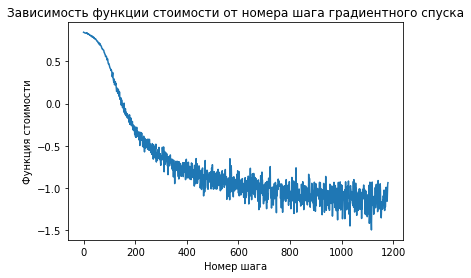

In [ ]:
# Начинаем обучение
for epoch in range(EPOCHS):
    for i, (batch, labels) in enumerate(train_loader):  # разбиваем выборку на пакеты
        # Нужно реализовать один шаг градиентного спуска
        loss = torch.tensor(0, dtype=torch.float32)  # значение функции стоимости на пакете, нужно рассчитать
        # ВАШ КОД ЗДЕСЬ
        batch = batch.reshape(batch.shape[0], -1).to(device)
        optimizer.zero_grad()
        loss = loss_function(model(batch), labels.to(device))
        loss.backward()
        optimizer.step()
        # ===============
        loss_history.append(loss.log().item())  # добавляется логарифм стоимости для большей наглядности
    print(f'Эпоха {epoch + 1} завершилась с функцией стоимости на последнем пакете = {loss.item()}')

# Выводим график функции стоимости
plt.title('Зависимость функции стоимости от номера шага градиентного спуска')
plt.xlabel('Номер шага')
plt.ylabel('Функция стоимости')
plt.plot(loss_history)
plt.show()

In [ ]:
# Отключаем расчет вычислительного графа для экономии времени и памяти: нам не нужно считать градиенты при тестировании модели
with torch.no_grad():
    # Оцениваем качество модели
    train_data_loader = DataLoader(train_data, batch_size=len(train_data))
    train_features, train_targets = next(iter(train_data_loader))

    train_features = train_features.reshape(len(train_data), -1).to(device)
    train_model_predictions = torch.argmax(model(train_features), dim=1)
    print('Точность (accuracy) на обучающей выборке:', accuracy_score(train_data.targets, train_model_predictions.cpu()))

    test_data_loader = DataLoader(test_data, batch_size=len(test_data))
    test_features, test_targets = next(iter(test_data_loader))

    test_features = test_features.reshape(len(test_data), -1).to(device)
    test_model_predictions = torch.argmax(model(test_features), dim=1)
    print('Точность (accuracy) на тестовой выборке:', accuracy_score(test_data.targets, test_model_predictions.cpu()))


Точность (accuracy) на обучающей выборке: 0.9091833333333333
Точность (accuracy) на тестовой выборке: 0.9139


# Часть 2

Во второй части вам необходимо воспроизвести в PyTorch сверточную сеть LeNet и также обучить ее на наборе MNIST.

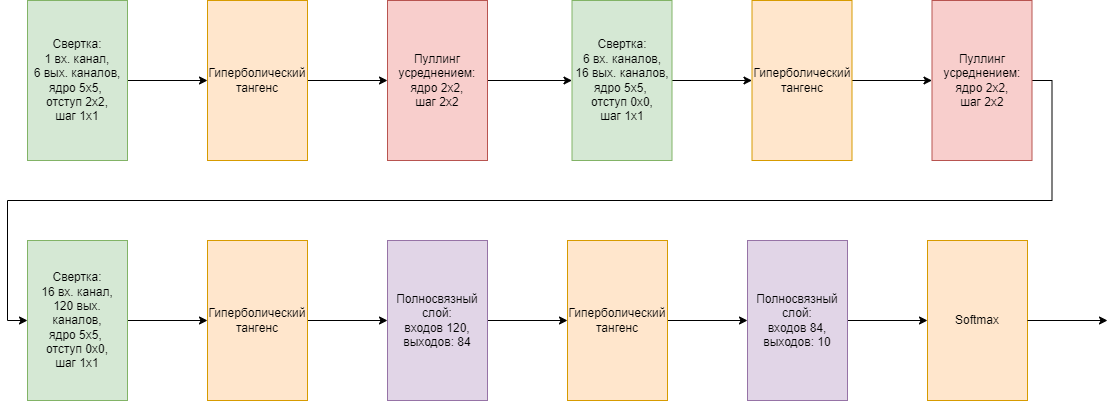

In [3]:
#(H + 2*pad - (ker-1) - 1)/stride + 1 -- conv
# Класс сети LeNet.
# Нужно реализовать сеть с архитектурой, описанной на изображении lenet.png.
class LeNet(nn.Module):

    def __init__(self):
        super().__init__()

        # ВАШ КОД ЗДЕСЬ
        self.tan = nn.Tanh()
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)
        self.out = nn.Softmax()

        self.c1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2) 
        self.c2 = nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0) 
        self.c3 = nn.Conv2d(16, 120, kernel_size=5, stride=1, padding=0)

        self.full1 = nn.Linear(120, 84)
        self.full2 = nn.Linear(84, 10)
        # ===============

    def forward(self, x): #x = 32*32*1
        # ВАШ КОД ЗДЕСЬ
        x = self.pool(self.tan(self.c1(x))) #28*28*6 > 14*14*6
        x = self.pool(self.tan(self.c2(x))) # 10*10*16 > 5*5*16
        x = self.tan(self.c3(x)) # 1*1*120

        x = x.view(x.size(0), -1)

        x = self.full2(self.tan(self.full1(x)))
        # x = self.out(x)
        return x
        # ===============

In [6]:
# Задаем количество эпох (проходов по всей обучающей выборке) и размер пакета, можно варьировать
EPOCHS = 10
BATCH_SIZE = 256

In [5]:
# Если графический ускоритель поддерживает обучение на нем, будем использовать его,
# иначе обучать на процессоре.
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
# Загружаем данные из набора MNIST
train_data = datasets.MNIST(root='./data/train', train=True, download=True, transform=ToTensor())
test_data = datasets.MNIST(root='./data/test', train=False, download=True, transform=ToTensor())

# DataLoader позволяет разбить выборку на пакеты заданного размера.
# Параметр shuffle отвечает за перемешивание данных в пакете
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

# Готовимся к обучению
model = LeNet().to(device)  # создаем модель
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01, momentum=0.95)  # оптимизатор, нужно выбрать и настроить
loss_function = nn.CrossEntropyLoss()  # функция потерь, нужно выбрать
loss_history = list()  # список для хранения истории изменения функции стоимости


Эпоха 1 завершилась с функцией стоимости на последнем пакете = 0.46470069885253906
Эпоха 2 завершилась с функцией стоимости на последнем пакете = 0.1459859162569046
Эпоха 3 завершилась с функцией стоимости на последнем пакете = 0.10230455547571182
Эпоха 4 завершилась с функцией стоимости на последнем пакете = 0.2130199521780014
Эпоха 5 завершилась с функцией стоимости на последнем пакете = 0.06206677481532097
Эпоха 6 завершилась с функцией стоимости на последнем пакете = 0.07763483375310898
Эпоха 7 завершилась с функцией стоимости на последнем пакете = 0.017139440402388573
Эпоха 8 завершилась с функцией стоимости на последнем пакете = 0.024525871500372887
Эпоха 9 завершилась с функцией стоимости на последнем пакете = 0.04322291538119316
Эпоха 10 завершилась с функцией стоимости на последнем пакете = 0.038643162697553635


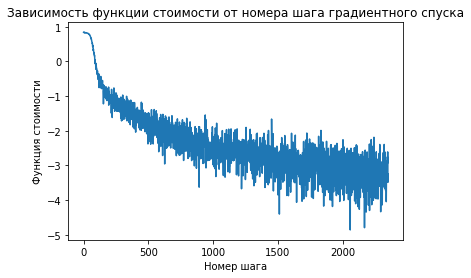

In [ ]:
# Начинаем обучение
for epoch in range(EPOCHS):
    for i, (batch, labels) in enumerate(train_loader):  # разбиваем выборку на пакеты
        # Нужно реализовать один шаг градиентного спуска
        loss = torch.tensor(0, dtype=torch.float32)  # значение функции стоимости на пакете, нужно рассчитать
        # ВАШ КОД ЗДЕСЬ
        batch = batch.to(device)
        optimizer.zero_grad()
        loss = loss_function(model(batch), labels.to(device))
        loss.backward()
        optimizer.step()
        # ===============
        loss_history.append(loss.log().item())  # добавляется логарифм стоимости для большей наглядности
    print(f'Эпоха {epoch + 1} завершилась с функцией стоимости на последнем пакете = {loss.item()}')

# Выводим график функции стоимости
plt.title('Зависимость функции стоимости от номера шага градиентного спуска')
plt.xlabel('Номер шага')
plt.ylabel('Функция стоимости')
plt.plot(loss_history)
plt.show()

In [ ]:
# Отключаем расчет вычислительного графа для экономии времени и памяти: нам не нужно считать градиенты при тестировании модели
with torch.no_grad():
    # Оцениваем качество модели
    train_data_loader = DataLoader(train_data, batch_size=len(train_data))
    train_features, train_targets = next(iter(train_data_loader))

    train_features = train_features.to(device)
    train_model_predictions = torch.argmax(model(train_features), dim=1)
    print('Точность (accuracy) на обучающей выборке:', accuracy_score(train_data.targets, train_model_predictions.cpu()))

    test_data_loader = DataLoader(test_data, batch_size=len(test_data))
    test_features, test_targets = next(iter(test_data_loader))

    test_features = test_features.to(device)
    test_model_predictions = torch.argmax(model(test_features), dim=1)
    print('Точность (accuracy) на тестовой выборке:', accuracy_score(test_data.targets, test_model_predictions.cpu()))


Точность (accuracy) на обучающей выборке: 0.9880833333333333
Точность (accuracy) на тестовой выборке: 0.9836
